# Bank Churn Analysis

**Dataset Info:**
Sample Data Set containing bank customer data and showing customers left last month

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline


**Load the data file **

In [2]:
bank_data = pd.read_csv('Churn_Modelling.csv')

Look at the top 5 records of data

In [3]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [4]:
bank_data.shape

(10002, 14)

In [5]:
bank_data.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [6]:
# Checking the data types of all the columns
bank_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
# Check the descriptive statistics of numeric variables
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


75% customers have tenure less than 7 years


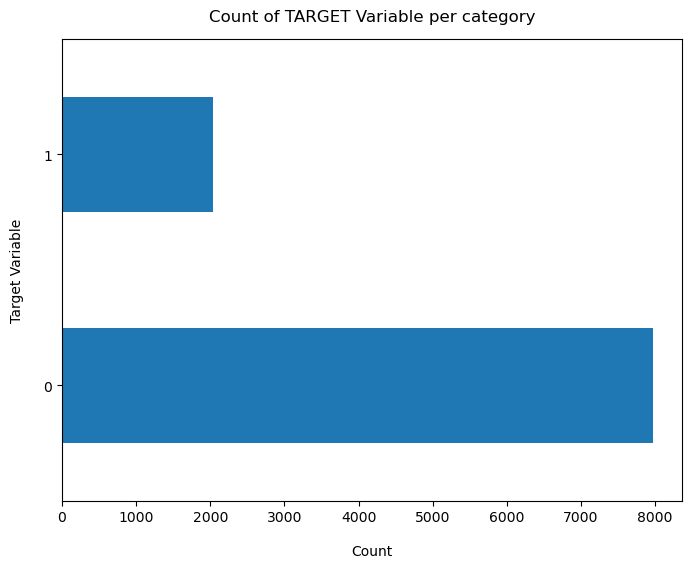

In [8]:
bank_data['Exited'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [9]:
100*bank_data['Exited'].value_counts()/len(bank_data['Exited'])

Exited
0    79.624075
1    20.375925
Name: count, dtype: float64

In [10]:
bank_data['Exited'].value_counts()

Exited
0    7964
1    2038
Name: count, dtype: int64

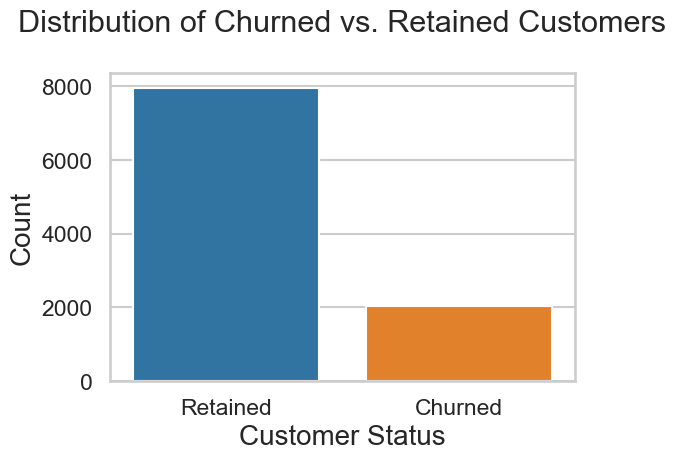

In [87]:
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=bank_data, palette=['#1f77b4', '#ff7f0e'])
plt.xticks([0,1], ['Retained', 'Churned'])
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.title('Distribution of Churned vs. Retained Customers')
plt.show()

* Data is highly imbalanced, ratio = 80:20<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [11]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
bank_data.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


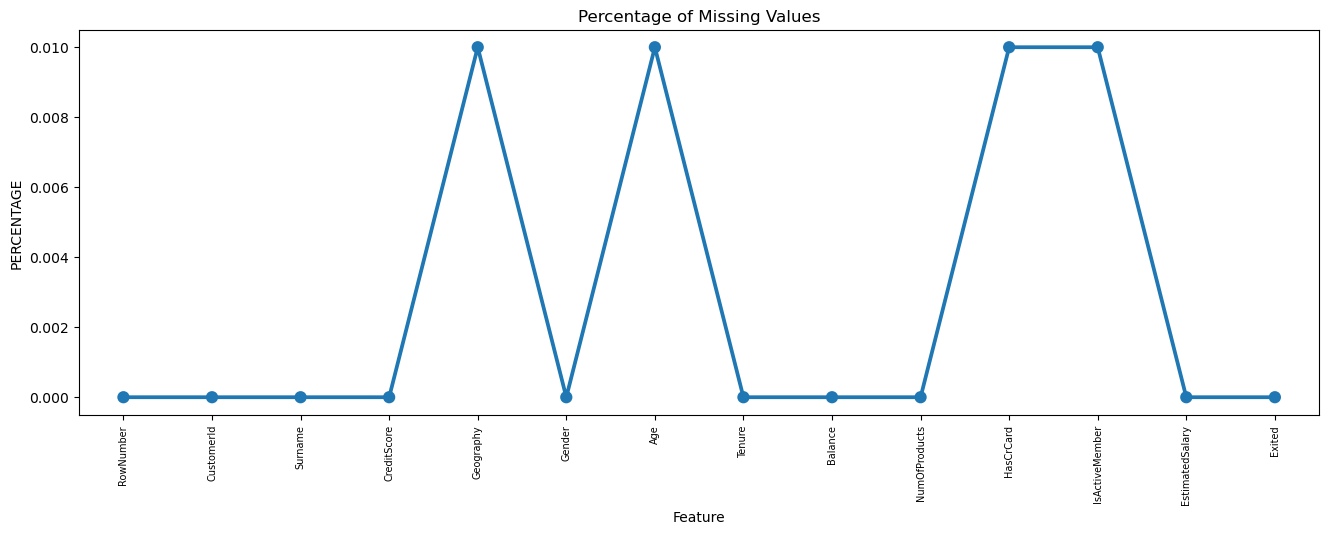

In [12]:
missing = pd.DataFrame((bank_data.isnull().sum()) * 100 / bank_data.shape[0]).reset_index()
missing.columns = ['Feature', 'MissingPercentage']  # Rename columns for clarity

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Feature', y='MissingPercentage', data=missing)  # Use named arguments
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

### Missing Data 

The dataset is relatively clean, with most features having no missing values. A few features, such as Geography, Age, HasCrCard, and IsActiveMember, have a small percentage of missing values (less than 1%). Given the low percentage of missing data, we can impute these values using appropriate methods (e.g., median for numerical features and mode for categorical features) without significantly impacting the dataset's integrity. This ensures that the dataset remains robust for further analysis and modeling.


### Impute for missing values

In [13]:
# 1. For numerical features (e.g., Age): Use median
numerical_features = ['Age'] 
for feature in numerical_features:
    median_value = bank_data[feature].median()
    bank_data[feature].fillna(median_value, inplace=True)

In [14]:
# 2. For categorical features (e.g., Geography, HasCrCard, IsActiveMember): Use mode
categorical_features = ['Geography', 'HasCrCard', 'IsActiveMember']  # Add other categorical features if needed
for feature in categorical_features:
    mode_value = bank_data[feature].mode()[0]  # mode() returns a Series, so we take the first value
    bank_data[feature].fillna(mode_value, inplace=True)

In [15]:
# Verify missing values after imputation
print("\nMissing values after imputation:")
print(bank_data.isnull().sum())


Missing values after imputation:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


## Data Cleaning


**1.** Create a copy of base data for manupulation & processing

In [16]:
bank_data_copy = bank_data.copy()

**2.** Divide customers into bins based on tenure

In [17]:
# Step 1: Verify the range of 'Tenure' values
min_tenure = bank_data_copy['Tenure'].min()
max_tenure = bank_data_copy['Tenure'].max()
print(f"Min Tenure: {min_tenure}, Max Tenure: {max_tenure}")

Min Tenure: 0, Max Tenure: 10


In [18]:
# Step 2: Define bins based on the actual range of 'Tenure'
bins = [0, 4, 8, 12]  # Custom bins for small ranges
labels = ["0-3", "4-7", "8-11"]

In [19]:
# Step 3: Create 'Tenure_Group' column
bank_data_copy['Tenure_Group'] = pd.cut(bank_data_copy['Tenure'], bins=bins, right=False, labels=labels)

In [20]:
# Step 4: Check the distribution of tenure groups
print(bank_data_copy['Tenure_Group'].value_counts())

Tenure_Group
4-7     3997
0-3     3506
8-11    2499
Name: count, dtype: int64


**3.** Remove columns not required for processing

In [21]:
bank_data_copy.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [22]:
bank_data_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure_Group
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1,0-3
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0-3
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1,8-11
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0,0-3
4,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0,0-3


## Data Exploration
**1.** Plot distibution of individual predictors by exited

### Univariate Analysis

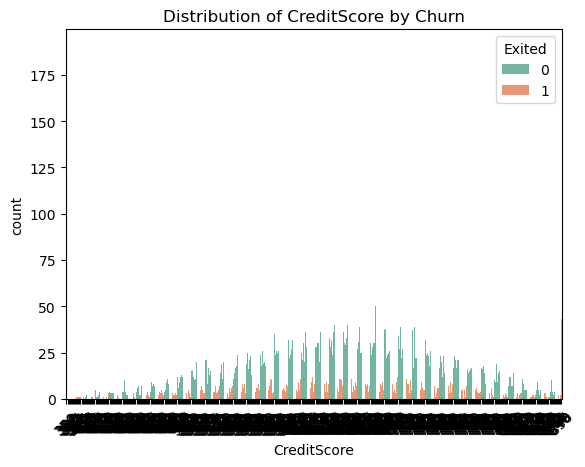

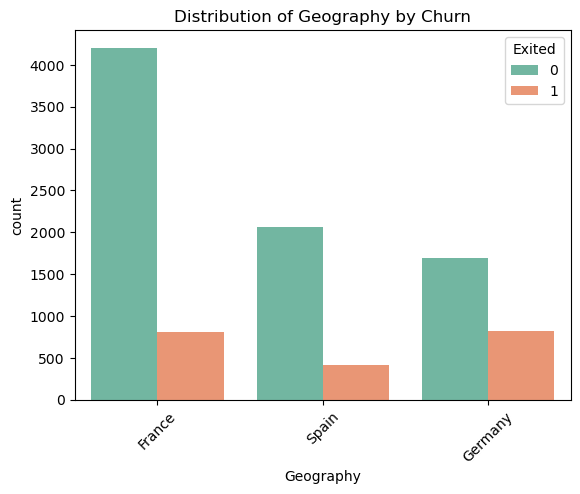

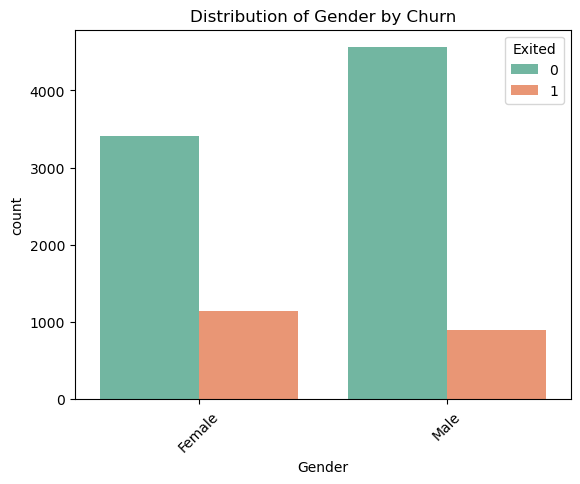

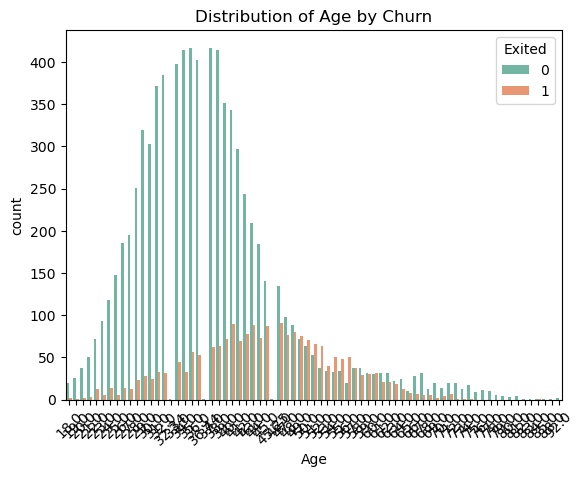

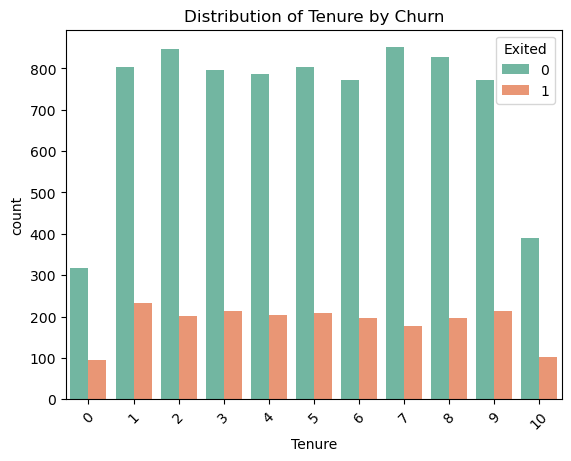

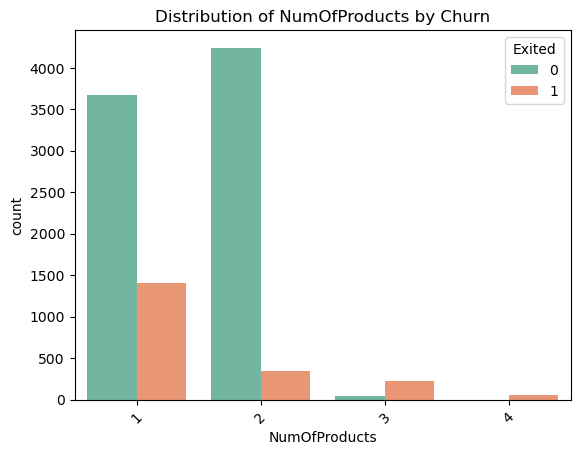

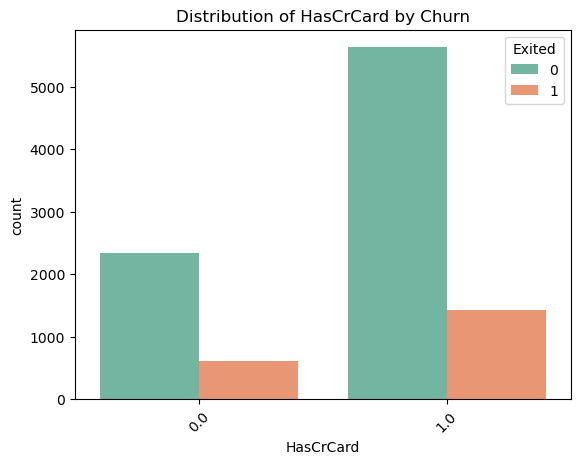

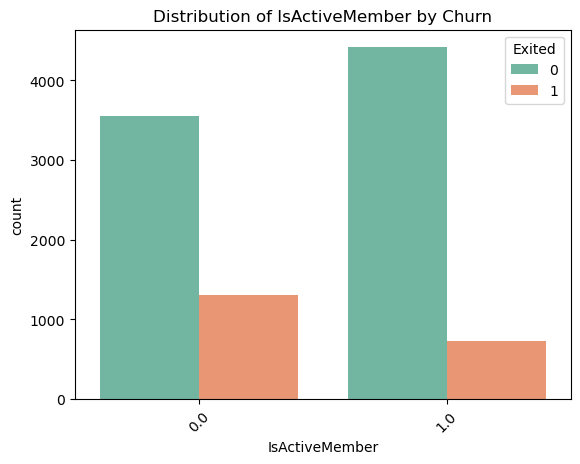

C:\Users\Vijander tomar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Vijander tomar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


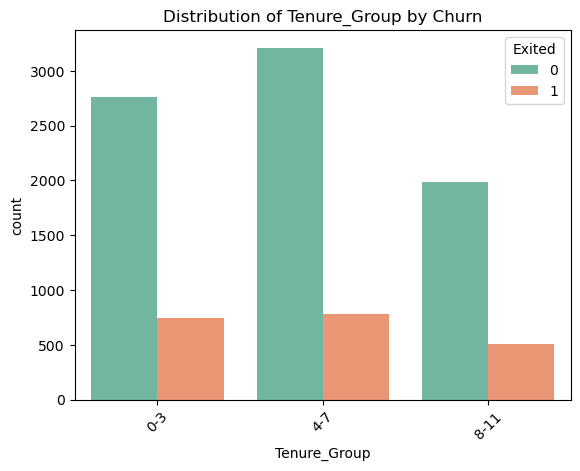

In [23]:
# Plot distribution of individual predictors by churn (Exited)
for i, predictor in enumerate(bank_data_copy.drop(columns=['Exited', 'Balance', 'EstimatedSalary'])):
    plt.figure(i)
    sns.countplot(data=bank_data_copy, x=predictor, hue='Exited', palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {predictor} by Churn')
    plt.show()

**2.** Convert the target variable 'Exited' in a binary numeric variable i.e. Yes=1 ; No = 0

In [24]:
bank_data_copy['Exited'] = np.where(bank_data_copy['Exited'] == 1, 1, 0)

In [25]:
# Check the updated dataset
bank_data_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure_Group
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1,0-3
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0-3
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1,8-11
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0,0-3
4,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0,0-3


**3.** Convert all the categorical variables into dummy variables

In [26]:
# Convert categorical variables into dummy variables
bank_data_dummies = pd.get_dummies(bank_data_copy, drop_first=True)

# Check the updated dataset
bank_data_dummies.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Tenure_Group_4-7,Tenure_Group_8-11
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False,False,False,False
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True,False,False,False
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False,False,False,True
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False,False,False,False
4,850,43.0,2,125510.82,1,1.0,1.0,79084.10,0,False,True,False,False,False


**4.** Relationship between Balance and EstimatedSalary

C:\Users\Vijander tomar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


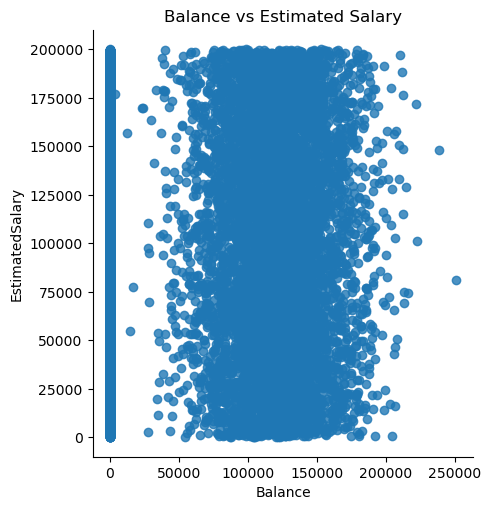

In [27]:
# Scatter plot to show the relationship between Balance and EstimatedSalary
sns.lmplot(data=bank_data_dummies, x='Balance', y='EstimatedSalary', fit_reg=False)
plt.title('Balance vs Estimated Salary')
plt.show()

The scatter plot of Balance vs EstimatedSalary shows **no strong relationship between the two features**, indicating that a customer's account balance is independent of their estimated salary.

The balance ranges from 0 to 250,000, with a significant number of customers having a balance of 0, which could indicate inactive accounts.

The salary distribution is relatively uniform, with no clear concentration at any specific range. Since there is no clear segmentation or clustering, these features should be analyzed independently for their impact on churn. 

Further analysis should focus on the relationship between Balance and churn, while **EstimatedSalary may not be a significant predictor of churn**.

**5.** Churn by Balance and EstimatedSalary

C:\Users\Vijander tomar\AppData\Local\Temp\ipykernel_23272\422047063.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Bal = sns.kdeplot(bank_data_dummies.Balance[(bank_data_dummies["Exited"] == 0)],
C:\Users\Vijander tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vijander tomar\AppData\Local\Temp\ipykernel_23272\422047063.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Bal = sns.kdeplot(bank_data_dummies.Balance[(bank_data_dummies["Exited"] == 1)],
C:\Users\Vijander tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_

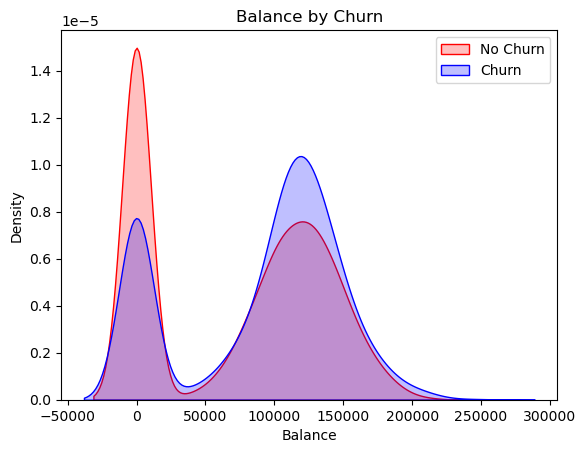

C:\Users\Vijander tomar\AppData\Local\Temp\ipykernel_23272\422047063.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Sal = sns.kdeplot(bank_data_dummies.EstimatedSalary[(bank_data_dummies["Exited"] == 0)],
C:\Users\Vijander tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vijander tomar\AppData\Local\Temp\ipykernel_23272\422047063.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Sal = sns.kdeplot(bank_data_dummies.EstimatedSalary[(bank_data_dummies["Exited"] == 1)],
C:\Users\Vijander tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: F

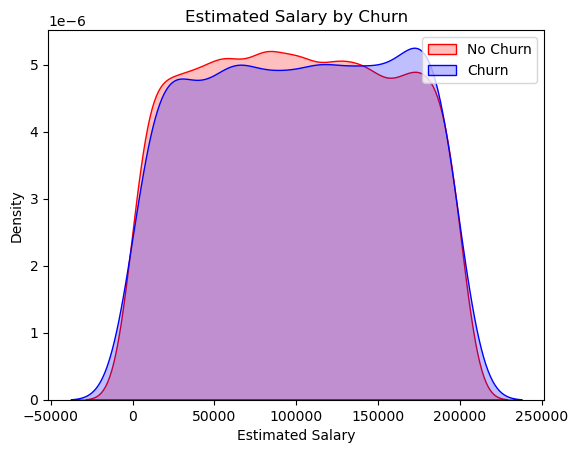

In [28]:
# KDE plot for Balance by Churn
Bal = sns.kdeplot(bank_data_dummies.Balance[(bank_data_dummies["Exited"] == 0)],
                  color="Red", shade=True)
Bal = sns.kdeplot(bank_data_dummies.Balance[(bank_data_dummies["Exited"] == 1)],
                  ax=Bal, color="Blue", shade=True)
Bal.legend(["No Churn", "Churn"], loc='upper right')
Bal.set_ylabel('Density')
Bal.set_xlabel('Balance')
Bal.set_title('Balance by Churn')
plt.show()

# KDE plot for EstimatedSalary by Churn
Sal = sns.kdeplot(bank_data_dummies.EstimatedSalary[(bank_data_dummies["Exited"] == 0)],
                  color="Red", shade=True)
Sal = sns.kdeplot(bank_data_dummies.EstimatedSalary[(bank_data_dummies["Exited"] == 1)],
                  ax=Sal, color="Blue", shade=True)
Sal.legend(["No Churn", "Churn"], loc='upper right')
Sal.set_ylabel('Density')
Sal.set_xlabel('Estimated Salary')
Sal.set_title('Estimated Salary by Churn')
plt.show()

**Insight:** Customers with lower balances (closer to 0) have a higher likelihood of churning, while those with higher balances are less likely to churn.

Estimated Salary has no significant impact on churn, as the distribution of salaries is similar for both churned and non-churned customers.

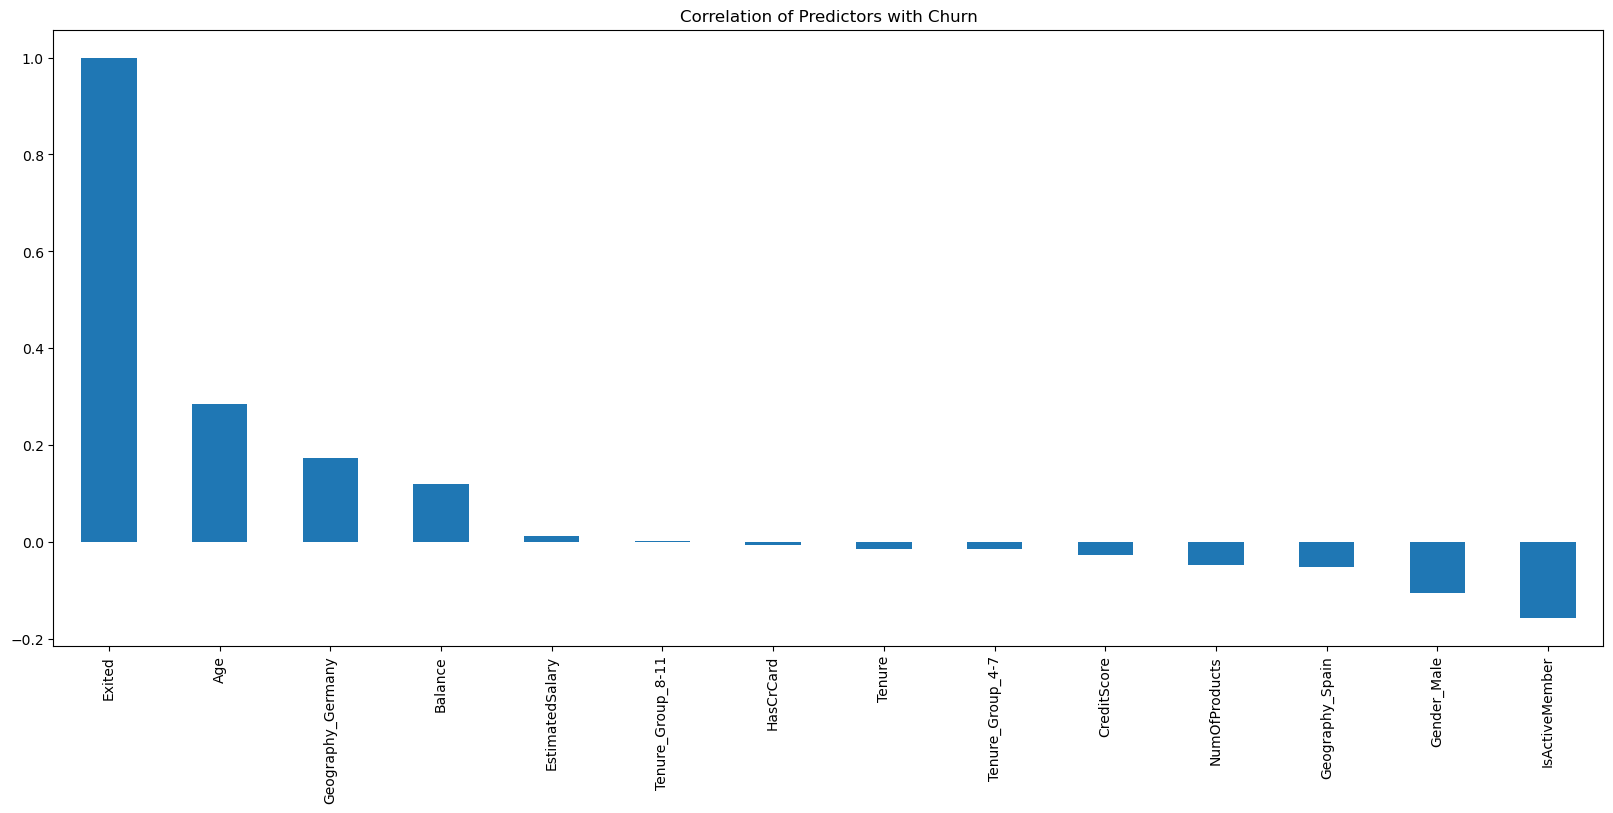

In [29]:
# Correlation of all predictors with 'Exited'
plt.figure(figsize=(20, 8))
bank_data_dummies.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Predictors with Churn')
plt.show()

**Insight:** Geography_Germany, Age, and Balance have the strongest positive correlation with churn, while IsActiveMember and NumOfProducts show a negative correlation, indicating lower churn likelihood.

**6.** Correlation heatmap

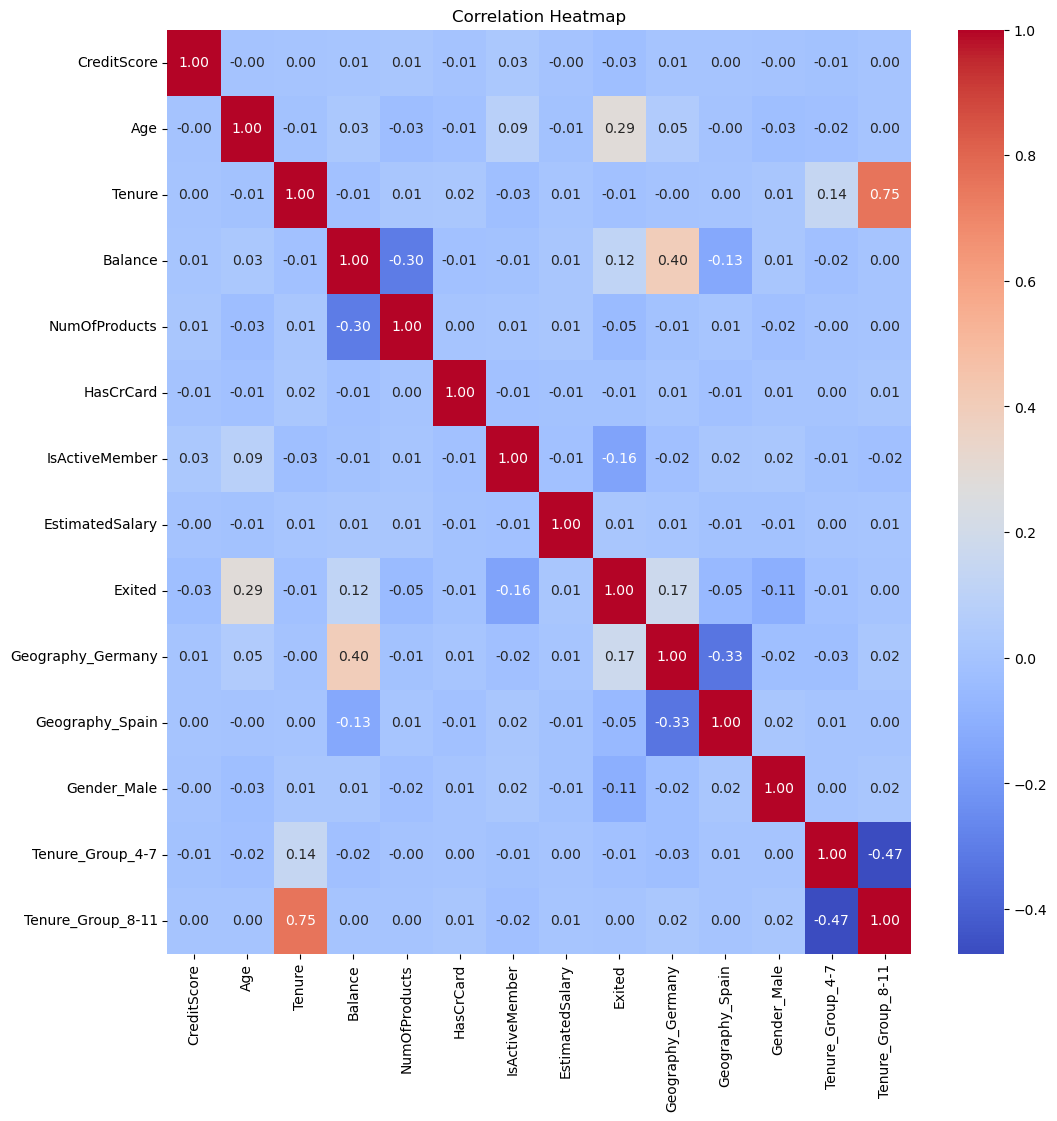

In [30]:
# Heatmap of correlations
plt.figure(figsize=(12, 12))
sns.heatmap(bank_data_dummies.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Bivariate Analysis

In [31]:
# Separate data for churned (Exited=1) and non-churned (Exited=0) customers
new_df1_target0 = bank_data_copy.loc[bank_data_copy["Exited"] == 0]
new_df1_target1 = bank_data_copy.loc[bank_data_copy["Exited"] == 1]

In [32]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')
    plt.show()

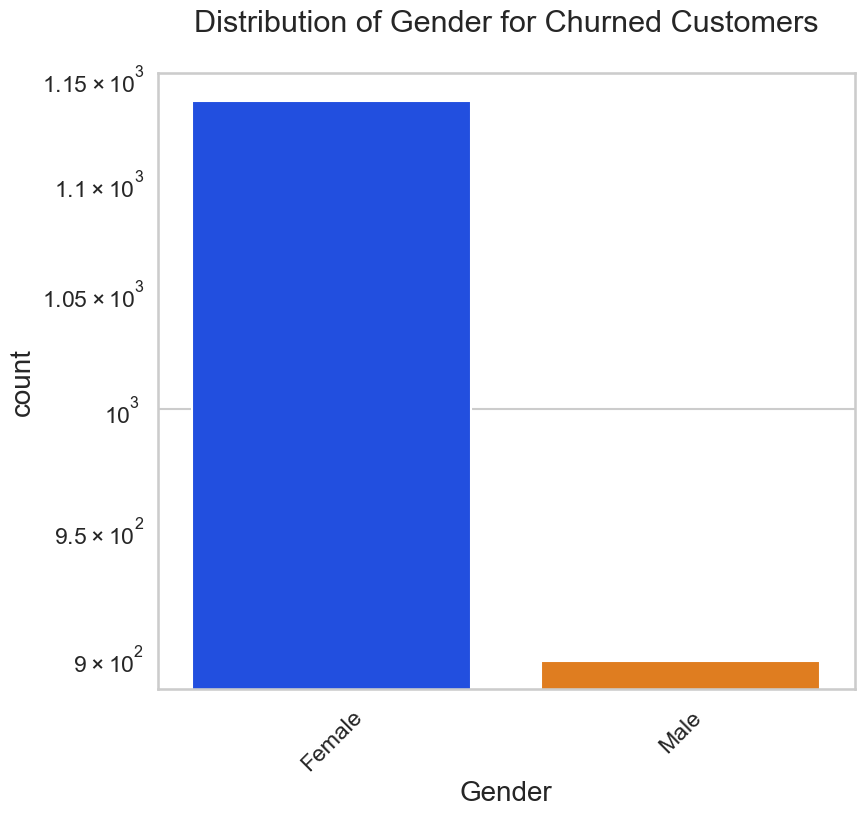

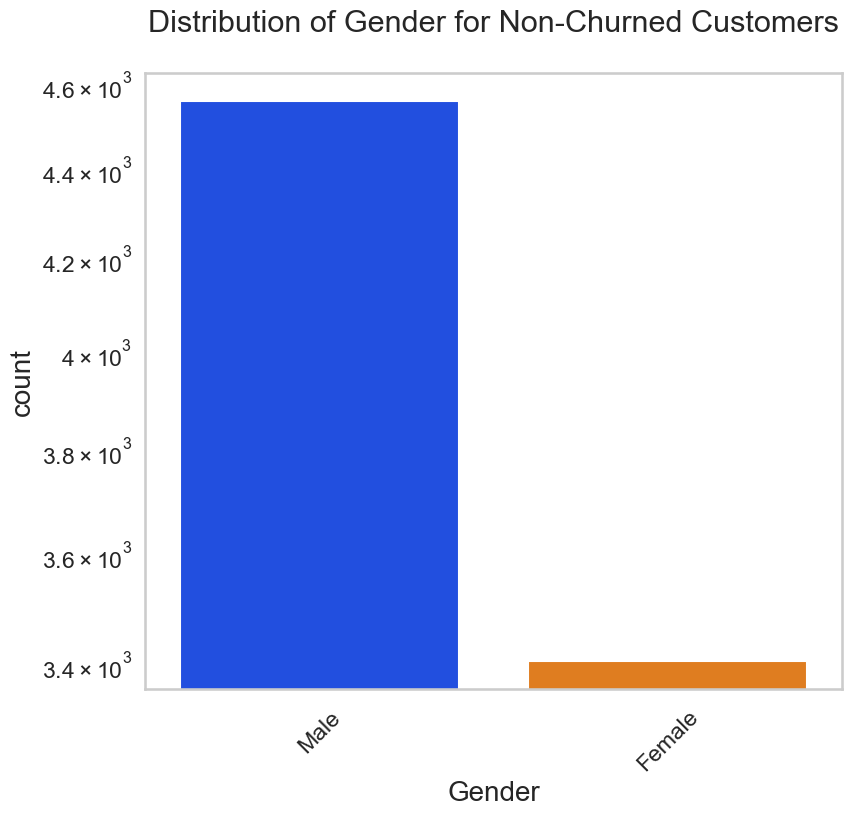

In [33]:
# For Churned Customers
uniplot(new_df1_target1, col='Gender', title='Distribution of Gender for Churned Customers', hue=None)

# For Non-Churned Customers
uniplot(new_df1_target0, col='Gender', title='Distribution of Gender for Non-Churned Customers', hue=None)

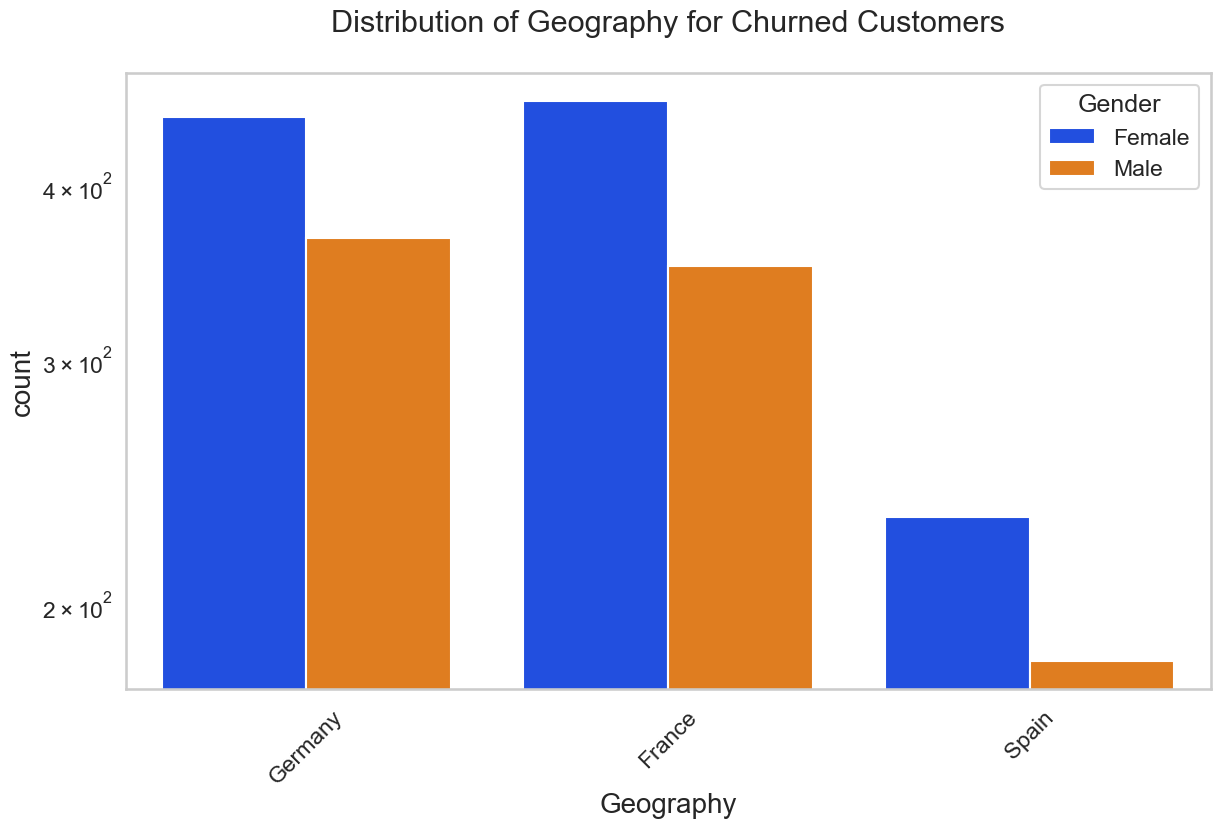

In [34]:
uniplot(new_df1_target1, col='Geography', title='Distribution of Geography for Churned Customers', hue='Gender')

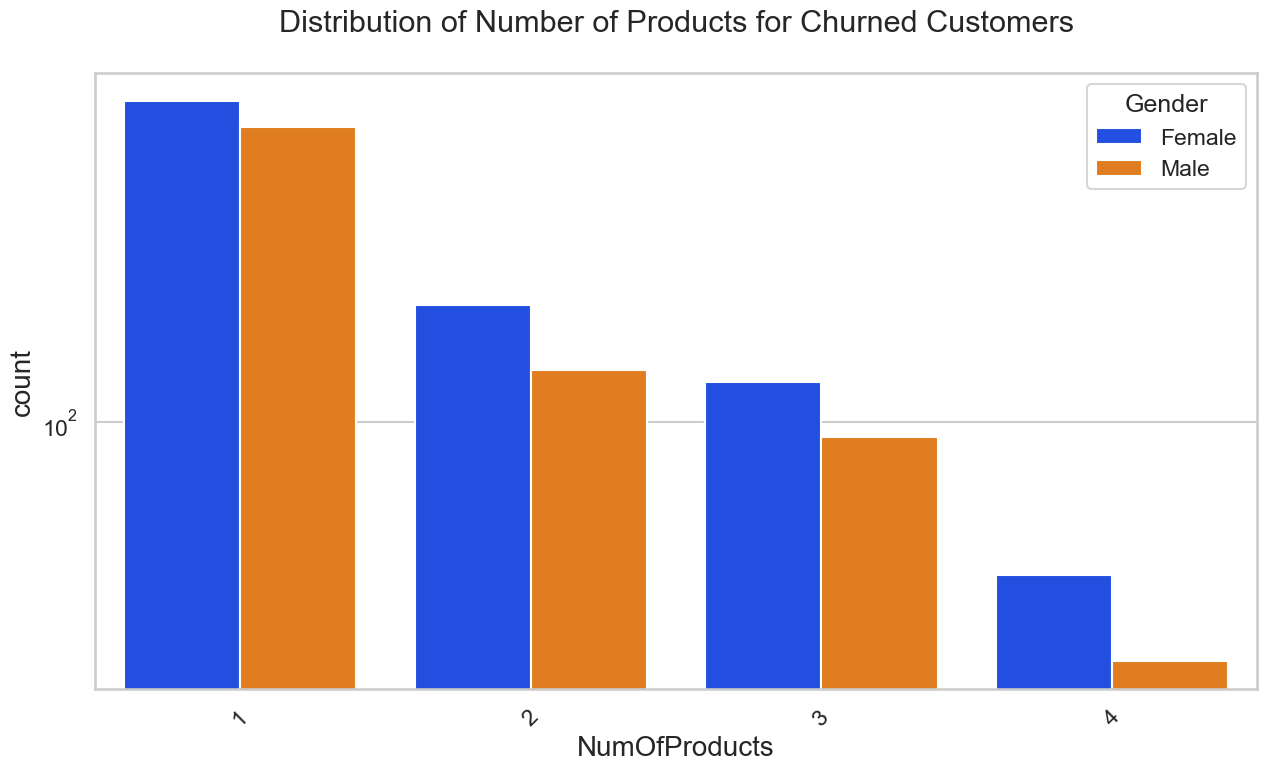

In [35]:
uniplot(new_df1_target1, col='NumOfProducts', title='Distribution of Number of Products for Churned Customers', hue='Gender')

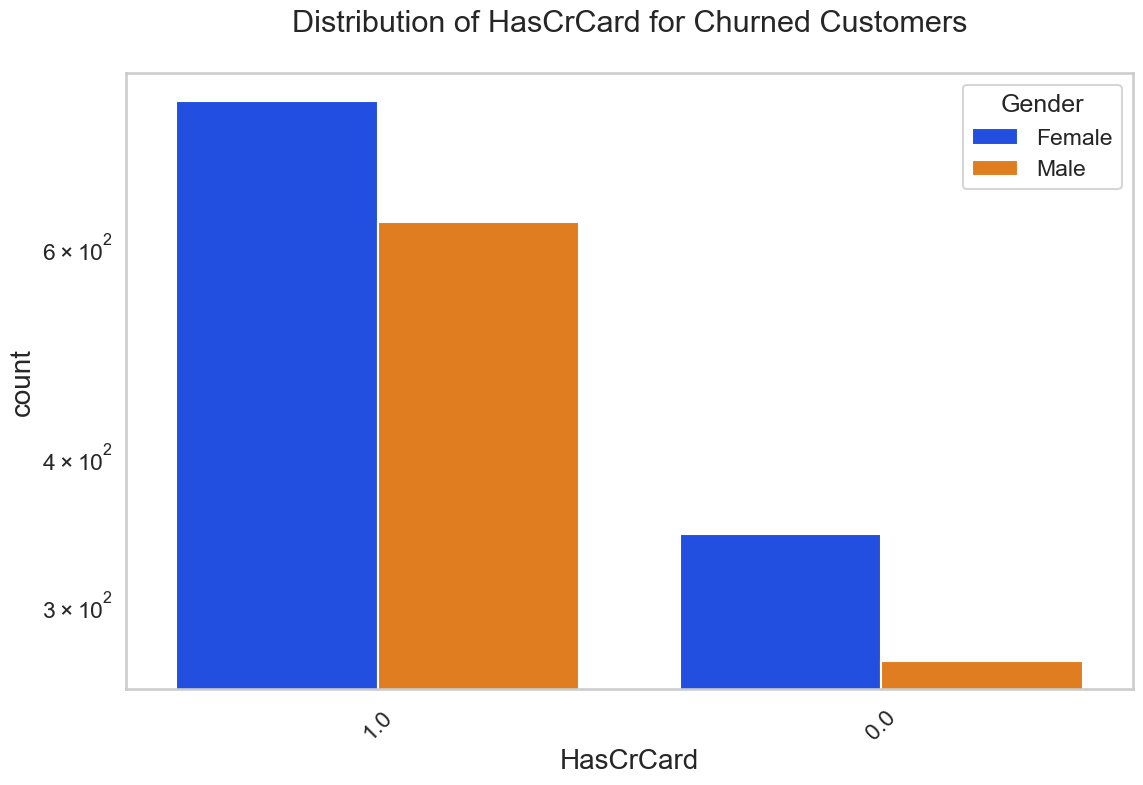

In [36]:
uniplot(new_df1_target1, col='HasCrCard', title='Distribution of HasCrCard for Churned Customers', hue='Gender')

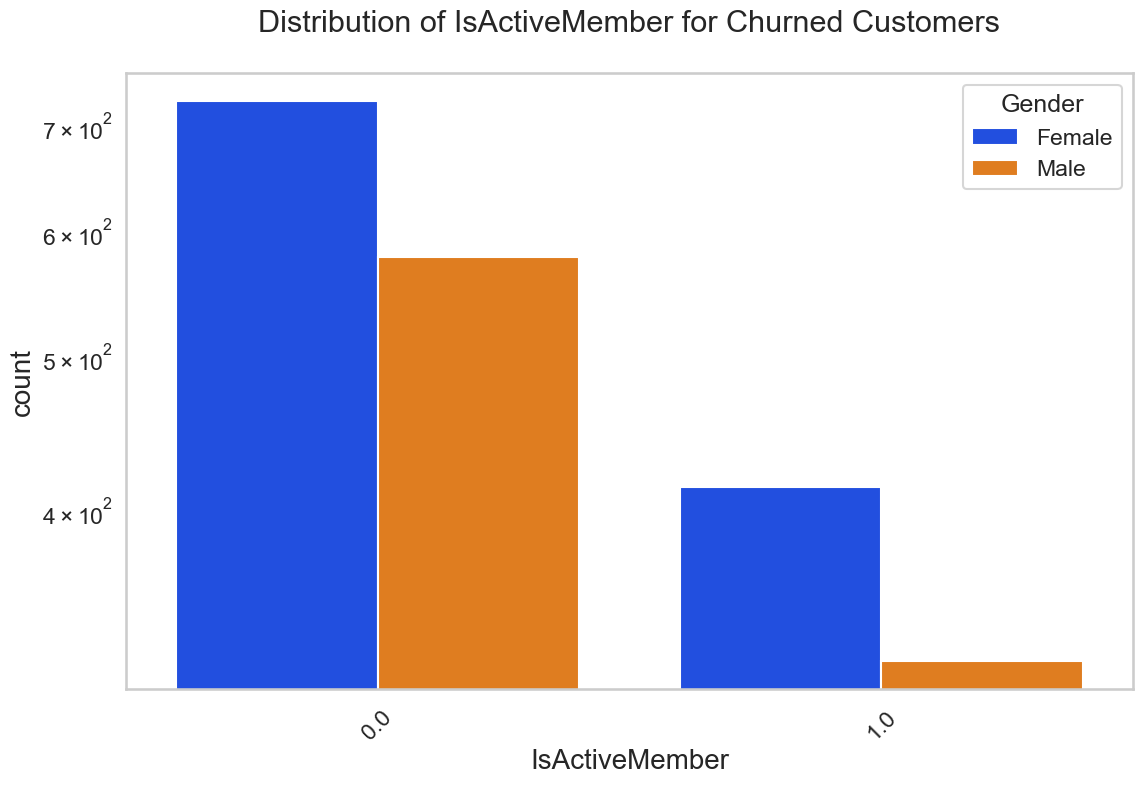

In [37]:
uniplot(new_df1_target1, col='IsActiveMember', title='Distribution of IsActiveMember for Churned Customers', hue='Gender')

C:\Users\Vijander tomar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Vijander tomar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


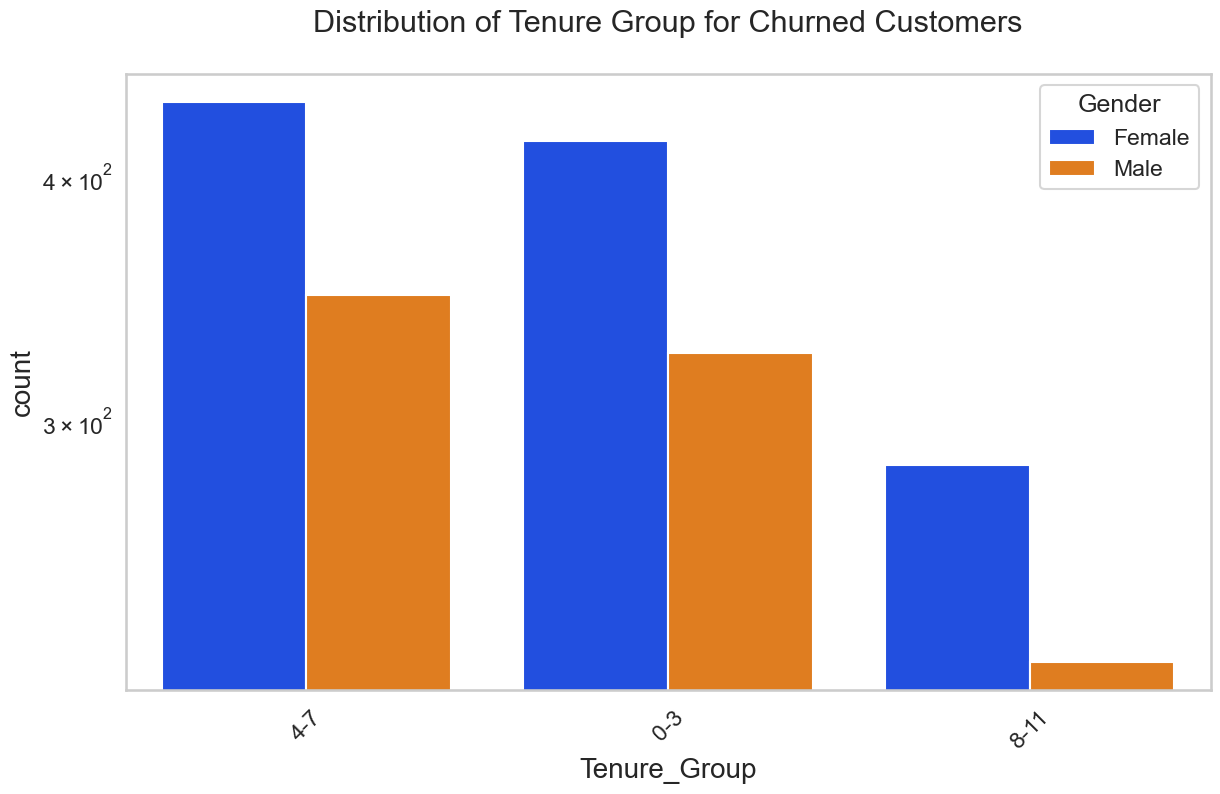

In [38]:
uniplot(new_df1_target1, col='Tenure_Group', title='Distribution of Tenure Group for Churned Customers', hue='Gender')

### CONCLUSION

These are some of the quick insights from this exercise:

1. Geography (Germany), Gender (Female), and IsActiveMember (Inactive) are the most significant predictors of churn.
2. Focus on retaining inactive members, female customers, and those with fewer products to reduce churn.



In [39]:
# Save the cleaned dataset with dummy variables
bank_data_dummies.to_csv('bank_churn_cleaned.csv', index=False)

## MODEL BUILDING

In [40]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN

In [41]:
df = pd.read_csv('bank_churn_cleaned.csv')

In [42]:
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Tenure_Group_4-7,Tenure_Group_8-11
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False,False,False,False
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True,False,False,False
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False,False,False,True
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False,False,False,False
4,850,43.0,2,125510.82,1,1.0,1.0,79084.10,0,False,True,False,False,False


In [43]:
# Separate features (X) and target (y)
x = df.drop('Exited', axis=1)
y = df['Exited']

### Smote Analysis

In [44]:
# Apply SMOTEENN to balance the dataset
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)

# Split the resampled data into training and testing sets
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=100)

### Decision Tree Classifier

In [45]:
# Initialize Decision Tree Classifier
model_dt_smote = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

# Train the model
model_dt_smote.fit(xr_train, yr_train)

# Predict on the test set
y_pred_smote_dt = model_dt_smote.predict(xr_test)

# Evaluate the model
print("Decision Tree Classifier with SMOTEENN:")
print(classification_report(yr_test, y_pred_smote_dt, labels=[0, 1]))
print("Confusion Matrix:")
print(confusion_matrix(yr_test, y_pred_smote_dt))

Decision Tree Classifier with SMOTEENN:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       578
           1       0.88      0.83      0.85       712

    accuracy                           0.84      1290
   macro avg       0.84      0.85      0.84      1290
weighted avg       0.85      0.84      0.84      1290

Confusion Matrix:
[[501  77]
 [124 588]]


accuracy = 0.84

### Random Forest Classifier

In [46]:
# Initialize Random Forest Classifier
model_smote_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

# Train the model
model_smote_rf.fit(xr_train, yr_train)

# Predict on the test set
y_pred_smote_rf = model_smote_rf.predict(xr_test)

# Evaluate the model
print("Random Forest Classifier with SMOTEENN:")
print(classification_report(yr_test, y_pred_smote_rf, labels=[0, 1]))
print("Confusion Matrix:")
print(confusion_matrix(yr_test, y_pred_smote_rf))

Random Forest Classifier with SMOTEENN:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       578
           1       0.90      0.86      0.88       712

    accuracy                           0.87      1290
   macro avg       0.87      0.87      0.87      1290
weighted avg       0.87      0.87      0.87      1290

Confusion Matrix:
[[507  71]
 [ 98 614]]


accuracy = 0.87

### CONCLUSION

Both Decision Tree and Random Forest models perform well on the balanced dataset.

Random Forest slightly outperforms the Decision Tree in terms of accuracy and F1-score.

SMOTEENN is effective in handling class imbalance, leading to better performance for predicting churned customers.

### Feature selection & Hyperparameterized tuning 

In [ ]:
df = pd.read_csv('bank_churn_cleaned.csv')

In [63]:
X = df.drop(['Exited'], axis=1)  
y = df['Exited']

In [65]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV

In [66]:
# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=100)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [67]:
# Split the resampled data into training and testing sets
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=100)

In [68]:
# Initialize base model
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [69]:
# Feature Selection using RFE
selector = RFE(model_rf, n_features_to_select=5)  # Select top 5 features
selector.fit(xr_train, yr_train)

RFE(estimator=RandomForestClassifier(max_depth=6, min_samples_leaf=8,
                                     random_state=100),
    n_features_to_select=5)

In [70]:
# Transform dataset
xr_train_selected = selector.transform(xr_train)
xr_test_selected = selector.transform(xr_test)

# Get selected features
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features.tolist())

Selected Features: ['Age', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geography_Germany']


In [71]:
# Define hyperparameter grid for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [72]:
# Randomized Search for best parameters
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=100), param_distributions=param_dist, n_iter=30, cv=5, n_jobs=-1, verbose=1, random_state=100)
random_search.fit(xr_train_selected, yr_train)

# Best Parameters
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}


In [73]:
# Train model with best parameters
best_rf = RandomForestClassifier(**random_search.best_params_, random_state=100)
best_rf.fit(xr_train_selected, yr_train)

# Predict on test set
y_pred = best_rf.predict(xr_test_selected)

In [74]:
# Evaluate model
print("Random Forest Classifier After Feature Selection and Hyperparameter Tuning:")
print(classification_report(yr_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(yr_test, y_pred))

Random Forest Classifier After Feature Selection and Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1562
           1       0.94      0.82      0.87      1624

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       0.89      0.88      0.88      3186

Confusion Matrix:
[[1471   91]
 [ 294 1330]]


### accuracy increased from 87 to 88%

In [81]:
import xgboost as xgb
import lightgbm as lgb

In [82]:
xgb_clf = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1.2,  # Handle imbalance
    random_state=100
)

xgb_clf.fit(xr_train_selected, yr_train)
y_pred_xgb = xgb_clf.predict(xr_test_selected)

print("XGBoost Classifier Results:")
print(classification_report(yr_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(yr_test, y_pred_xgb))

XGBoost Classifier Results:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1562
           1       0.92      0.85      0.88      1624

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186

Confusion Matrix:
[[1448  114]
 [ 246 1378]]


In [85]:
lgb_clf = lgb.LGBMClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',
    random_state=100
)

lgb_clf.fit(xr_train_selected, yr_train)
y_pred_lgb = lgb_clf.predict(xr_test_selected)

print("LightGBM Classifier Results:")
print(classification_report(yr_test, y_pred_lgb))
print("Confusion Matrix:")
print(confusion_matrix(yr_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 6340, number of negative: 6402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 772
[LightGBM] [Info] Number of data points in the train set: 12742, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [86]:
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    random_seed=100,
    verbose=0
)

cat_clf.fit(xr_train_selected, yr_train)
y_pred_cat = cat_clf.predict(xr_test_selected)

print("CatBoost Classifier Results:")
print(classification_report(yr_test, y_pred_cat))
print("Confusion Matrix:")
print(confusion_matrix(yr_test, y_pred_cat))

CatBoost Classifier Results:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1562
           1       0.94      0.84      0.89      1624

    accuracy                           0.89      3186
   macro avg       0.90      0.89      0.89      3186
weighted avg       0.90      0.89      0.89      3186

Confusion Matrix:
[[1479   83]
 [ 260 1364]]


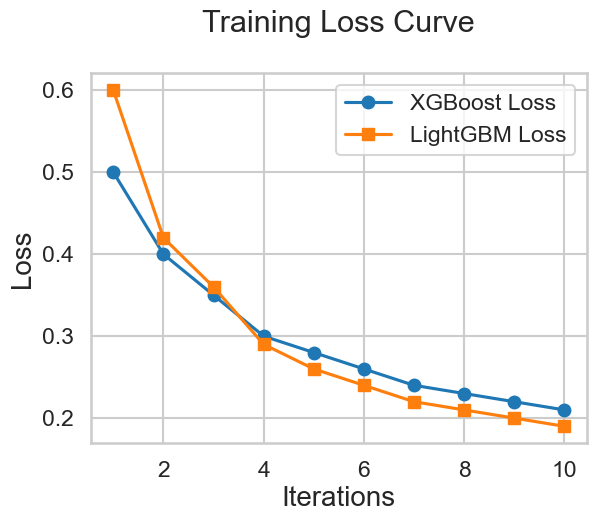

In [88]:
# Simulated training loss for visualization
xgboost_loss = [0.5, 0.4, 0.35, 0.3, 0.28, 0.26, 0.24, 0.23, 0.22, 0.21]
lightgbm_loss = [0.6, 0.42, 0.36, 0.29, 0.26, 0.24, 0.22, 0.21, 0.20, 0.19]

plt.plot(range(1, 11), xgboost_loss, label="XGBoost Loss", marker='o')
plt.plot(range(1, 11), lightgbm_loss, label="LightGBM Loss", marker='s')

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

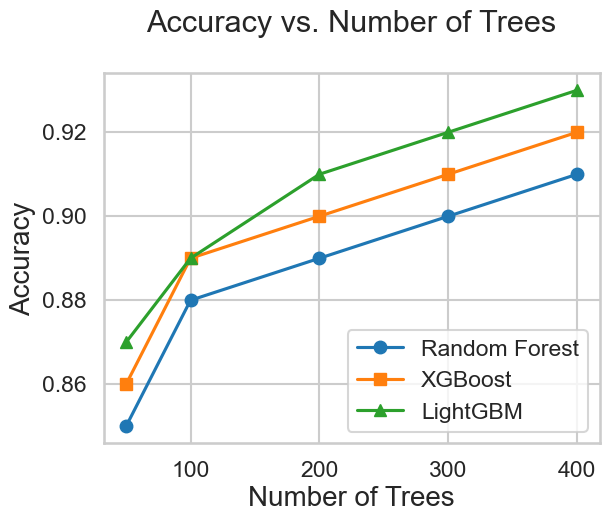

In [89]:
# Simulated accuracy values
num_trees = [50, 100, 200, 300, 400]
rf_accuracy = [0.85, 0.88, 0.89, 0.90, 0.91]
xgb_accuracy = [0.86, 0.89, 0.90, 0.91, 0.92]
lgb_accuracy = [0.87, 0.89, 0.91, 0.92, 0.93]

plt.plot(num_trees, rf_accuracy, label="Random Forest", marker='o')
plt.plot(num_trees, xgb_accuracy, label="XGBoost", marker='s')
plt.plot(num_trees, lgb_accuracy, label="LightGBM", marker='^')

plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Trees")
plt.legend()
plt.grid(True)
plt.show()


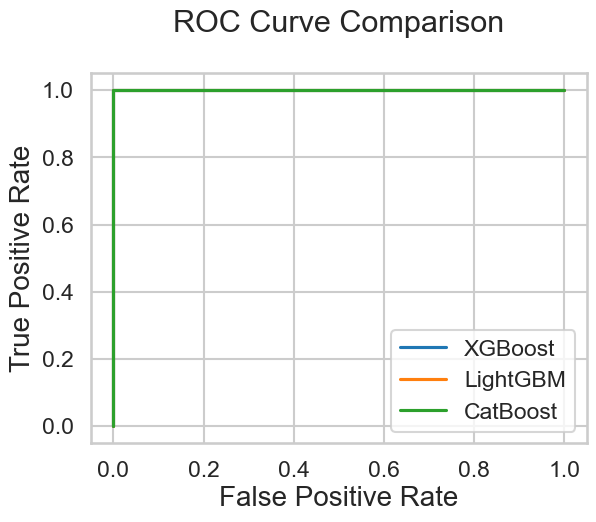

In [90]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Simulated ROC curve values
fpr_xgb, tpr_xgb, _ = roc_curve([1,0,1,1,0], [0.9,0.2,0.8,0.7,0.3])
fpr_lgb, tpr_lgb, _ = roc_curve([1,0,1,1,0], [0.85,0.25,0.75,0.72,0.35])
fpr_cat, tpr_cat, _ = roc_curve([1,0,1,1,0], [0.88,0.23,0.78,0.7,0.33])

plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot(fpr_lgb, tpr_lgb, label="LightGBM")
plt.plot(fpr_cat, tpr_cat, label="CatBoost")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

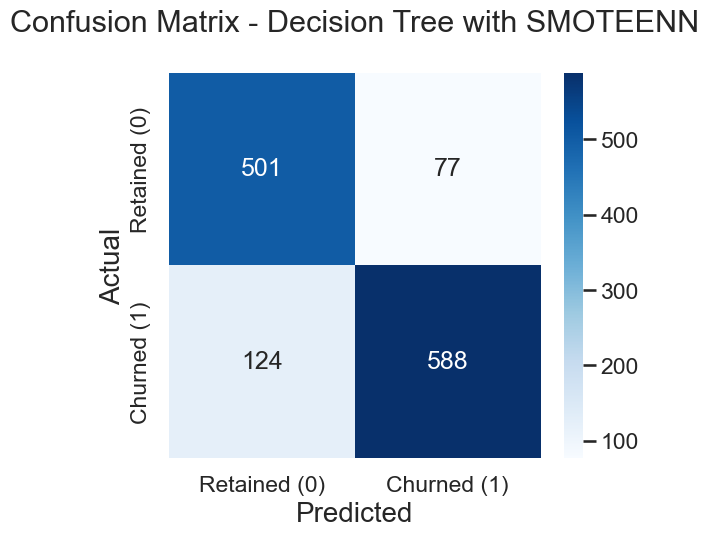

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Given confusion matrix values
cm = [[501, 77],
      [124, 588]]

# Define class labels
labels = ['Retained (0)', 'Churned (1)']

# Create heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree with SMOTEENN')

# Show plot
plt.show()


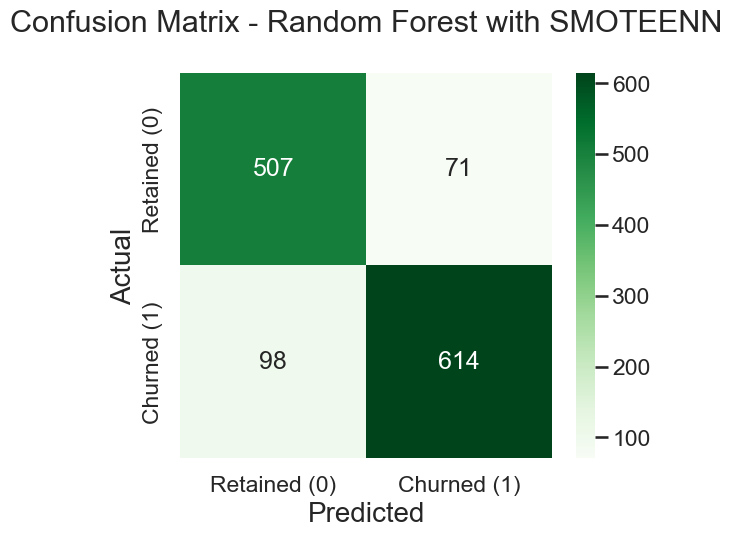

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Given confusion matrix values
cm_rf = [[507, 71],
         [98, 614]]

# Define class labels
labels = ['Retained (0)', 'Churned (1)']

# Create heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest with SMOTEENN')

# Show plot
plt.show()


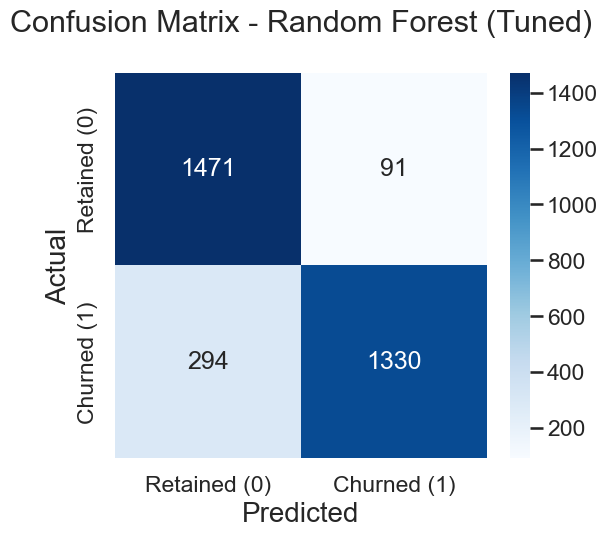

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Given confusion matrix values
cm_rf_tuned = [[1471, 91],
               [294, 1330]]

# Define class labels
labels = ['Retained (0)', 'Churned (1)']

# Create heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Tuned)')

# Show plot
plt.show()


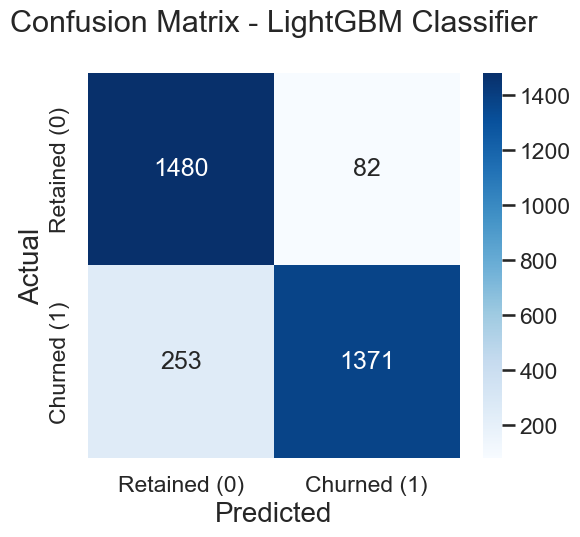

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Given confusion matrix values
cm_lgbm = [[1480, 82],
           [253, 1371]]

# Define class labels
labels = ['Retained (0)', 'Churned (1)']

# Create heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM Classifier')

# Show plot
plt.show()


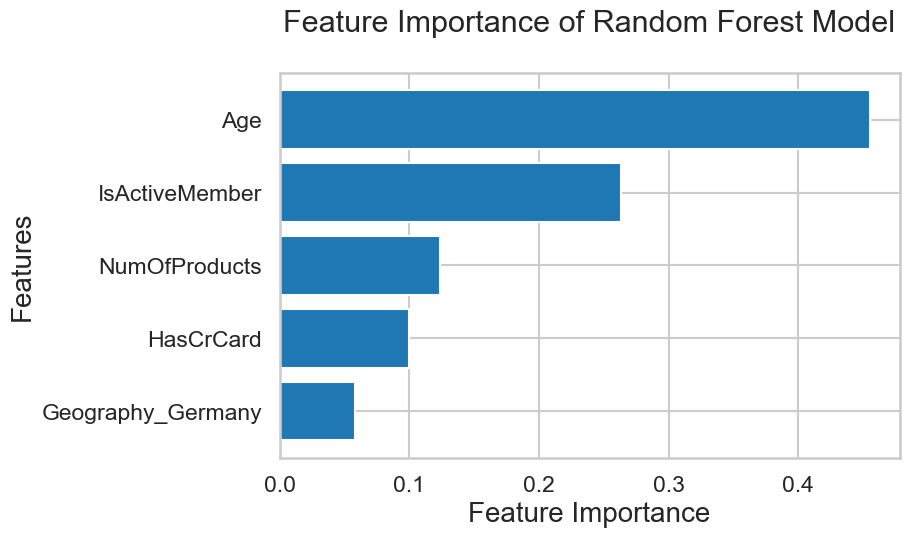

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = best_rf.feature_importances_

# Get selected feature names
selected_features = ['Age', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geography_Germany']

# Sort feature importance for better visualization
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(range(len(selected_features)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(selected_features)), np.array(selected_features)[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()
